In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling as yp

In [2]:
#fraud = pd.read_csv("Fraud.csv")
fraud = pd.read_csv("https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV")

In [3]:
#profile = yp.ProfileReport(fraud)

In [4]:
#profile.to_file("output.html")

In [5]:
ls

 Volume in drive D has no label.
 Volume Serial Number is AE4A-D456

 Directory of D:\Temp\INSAID

02/28/2023  19:56    <DIR>          .
02/28/2023  19:56    <DIR>          ..
02/28/2023  17:01    <DIR>          .ipynb_checkpoints
02/28/2023  16:36                 0 Data Dictionary.txt
02/28/2023  16:45             1,298 DataDictionary.txt
02/28/2023  19:56             5,236 EDA.ipynb
02/23/2023  14:58       493,534,783 Fraud.csv
02/23/2023  15:55         3,847,174 output.html
02/23/2023  14:52           479,882 Task Details.pdf
               6 File(s)    497,868,373 bytes
               3 Dir(s)  336,862,175,232 bytes free


In [6]:
with open('DataDictionary.txt') as f:
    [print(line) for line in f.readlines()]

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).



type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.



amount - amount of the transaction in local currency.



nameOrig - customer who started the transaction



oldbalanceOrg - initial balance before the transaction



newbalanceOrig - new balance after the transaction



nameDest - customer who is the recipient of the transaction



oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).



newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).



isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by tr

In [7]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
fraud['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
fraud['step'].unique().sum()

276396

In [10]:
fraud['Origin_Initials'] = fraud['nameOrig'].str.extract(r'^(.)')

In [11]:
#fraud = fraud.assign(Origin_Initials=fraud['nameOrig'].str[0])

In [12]:
fraud['Destination_Initials'] = fraud['nameDest'].str.extract(r'^(.)')

In [13]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Origin_Initials,Destination_Initials
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,C,M


In [14]:
fraud['Origin_Initials'].value_counts()

C    6362620
Name: Origin_Initials, dtype: int64

In [15]:
fraud['Destination_Initials'].value_counts()

C    4211125
M    2151495
Name: Destination_Initials, dtype: int64

In [16]:
fraud.drop(["Origin_Initials", "nameOrig", "nameDest"], axis=1, inplace=True)

In [17]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   type                  object 
 2   amount                float64
 3   oldbalanceOrg         float64
 4   newbalanceOrig        float64
 5   oldbalanceDest        float64
 6   newbalanceDest        float64
 7   isFraud               int64  
 8   isFlaggedFraud        int64  
 9   Destination_Initials  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 485.4+ MB


In [18]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Destination_Initials
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,M


In [19]:
pd.get_dummies(fraud['Destination_Initials'])

,C,M
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
6362615,1,0
6362616,1,0
6362617,1,0
6362618,1,0


In [20]:
fraud['Destination_Initials_M'] = pd.get_dummies(fraud['Destination_Initials'], drop_first=True)

In [21]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Destination_Initials,Destination_Initials_M
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,M,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,M,1
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,M,1


In [22]:
fraud.drop("Destination_Initials", axis = 1, inplace = True)

In [25]:
fraud['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [26]:
fraud['type_encoded'] = fraud['type'].map({'PAYMENT':0, 'TRANSFER':1, 'CASH_OUT':2, 'DEBIT':3, 'CASH_IN':4})

In [27]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Destination_Initials_M,type_encoded
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0,2
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


In [28]:
fraud.drop("type", axis=1, inplace = True)

<AxesSubplot:>

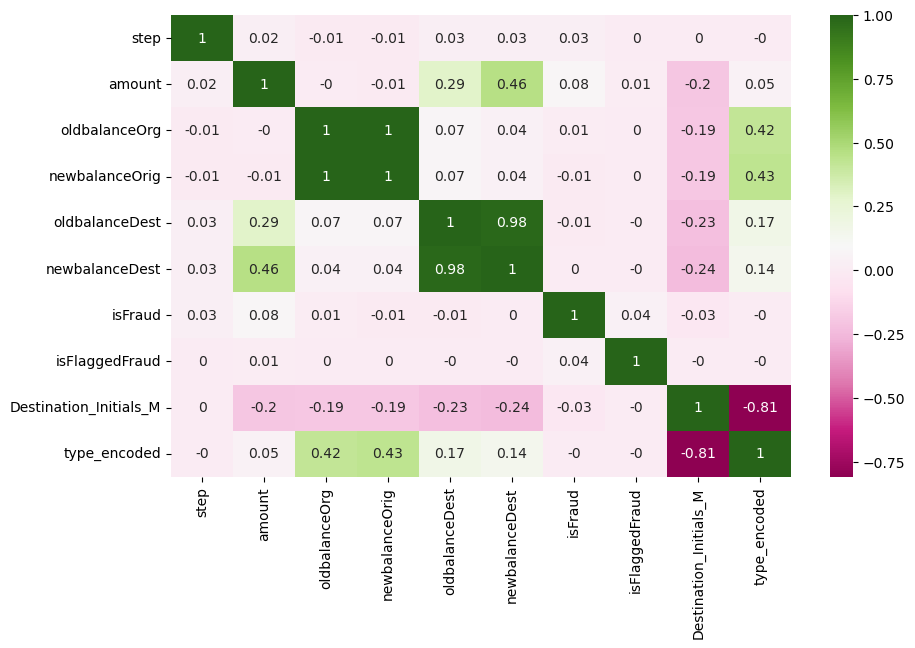

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(fraud.corr().round(2), annot=True, cmap="PiYG")

In [40]:
fraud.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'Destination_Initials_M',
       'type_encoded'],
      dtype='object')

In [41]:
fraud.drop(["oldbalanceOrg", "newbalanceDest", "Destination_Initials_M"], axis=1, inplace=True)

In [42]:
fraud.head()

,step,amount,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud,type_encoded
0,1,9839.64,160296.36,0.0,0,0,0
1,1,1864.28,19384.72,0.0,0,0,0
2,1,181.00,0.00,0.0,1,0,1
3,1,181.00,0.00,21182.0,1,0,2
4,1,11668.14,29885.86,0.0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
confusion_matrix(fraud.isFraud, fraud.isFlaggedFraud)

array([[6354407,       0],
       [   8197,      16]], dtype=int64)

In [ ]:
classification_report(fraud.isFraud, fraud.isFlaggedFraud)

In [51]:
X = fraud.drop(["isFraud", "isFlaggedFraud"], axis=1)
y = fraud["isFraud"]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import svm
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ["linear", "poly", "rbf", "sigmoid"]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)